**Библиотеки Python для DS (семинары)**

***Урок 3. Практическая работа. Построение модели Линейной регрессии***

В качестве датасета используется набор данных о жилищных условиях и ценах на жилье в Калифорнии (California housing dataset), доступный в библиотеках Python (например, sklearn.datasets).

Анализ и подготовка данных:

— Загрузите датасет California housing dataset.
— Выполните базовый анализ данных: вывод размера выборки, проверка на пропущенные значения, статистический анализ числовых переменных.
— Визуализируйте распределения нескольких выбранных числовых переменных и корреляции между ними.

Построение модели линейной регрессии:

— Разделите данные на обучающий и тестовый набор в соотношении 80/20.
— Используйте только две переменные (по вашему выбору) для построения модели линейной регрессии. Обоснуйте ваш выбор.
— Постройте модель линейной регрессии, обучите ее на обучающем наборе и сделайте предсказания на тестовом.
— Оцените качество модели с помощью подходящих метрик (R2, MSE, MAE).

Импортируем необходимые библиотеки

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Загрузим датасет и посмотрим на признаки

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

**Датасет о жилье в Калифорнии**

***Характеристики набора данных:***

* Количество строк: 20640
* Количество атрибутов: 8 числовых, прогнозных и целевых
* Пропущенные значения атрибутов: Нет

***Информация об атрибутах:***

MedInc: Средний доход в группе блоков

HouseAge: Средний возраст дома в группе блоков

AveRooms: Среднее количество комнат в домохозяйстве

AveBedrms: Среднее количество спален в домохозяйстве

Population: Численность населения в блоке, группе населения

AveOccup: Среднее количество проживающих в домохозяйстве

Latitude: Широта группы блоков по широте

Longitude: Долгота группы блоков по долготе

MedHouseVal: Средняя стоимость дома в 100 тыс.$

Целевой переменной является средняя стоимость дома для районов Калифорнии,
выраженная в сотнях тысяч долларов (100 000 долларов США).
Этот набор данных был получен на основе переписи населения США 1990 года с использованием одной строки для каждой группы блоков переписи.
Многоквартирный дом - это наименьшая географическая единица, для которой в США используются данные переписи населения.
Бюро переписи населения публикует выборочные данные (в многоквартирном доме обычно проживает от 600 до 3000 человек).
Домохозяйство - это группа людей, проживающих в одном доме. Поскольку среднее
количество комнат и спальных комнат в этом наборе данных указано на домохозяйство, эти
столбцы могут иметь неожиданно большие значения для групп кварталов с небольшим количеством домохозяйств
и большим количеством пустующих домов, таких как дома для отдыха.

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df['MedHouseVal'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


Выполним статистический анализ

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Код не выполняем, так как нет атрибутов с типом "object"
df.describe(include=object)

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

MedInc: 12928 distinct values
HouseAge: 52 distinct values
AveRooms: 19392 distinct values
AveBedrms: 14233 distinct values
Population: 3888 distinct values
AveOccup: 18841 distinct values
Latitude: 862 distinct values
Longitude: 844 distinct values
MedHouseVal: 3842 distinct values


In [ ]:
# Рассмотрим признак "HouseAge"
df.HouseAge.value_counts()

,count
HouseAge,
52.0,1273
36.0,862
35.0,824
16.0,771
17.0,698
34.0,689
26.0,619
33.0,615
18.0,570


In [ ]:
# Добавим новую категорию по возрасту дома
def assign_broader_category(row):
  if 0<row['HouseAge']<=5:
    return "before 5"
  elif 5<row['HouseAge']<=10:
    return "5-10"
  elif 10<row['HouseAge']<=25:
    return "10-25"
  elif 25<row['HouseAge']<=50:
    return "25-50"
  else:
    return "50+"

In [ ]:
df['HouseAge_category'] = df.apply(assign_broader_category, axis=1)

In [ ]:
df['HouseAge_category'].value_counts()

,count
HouseAge_category,
25-50,10689
10-25,7061
50+,1321
5-10,1010
before 5,559


Проанализируем категориальные признаки

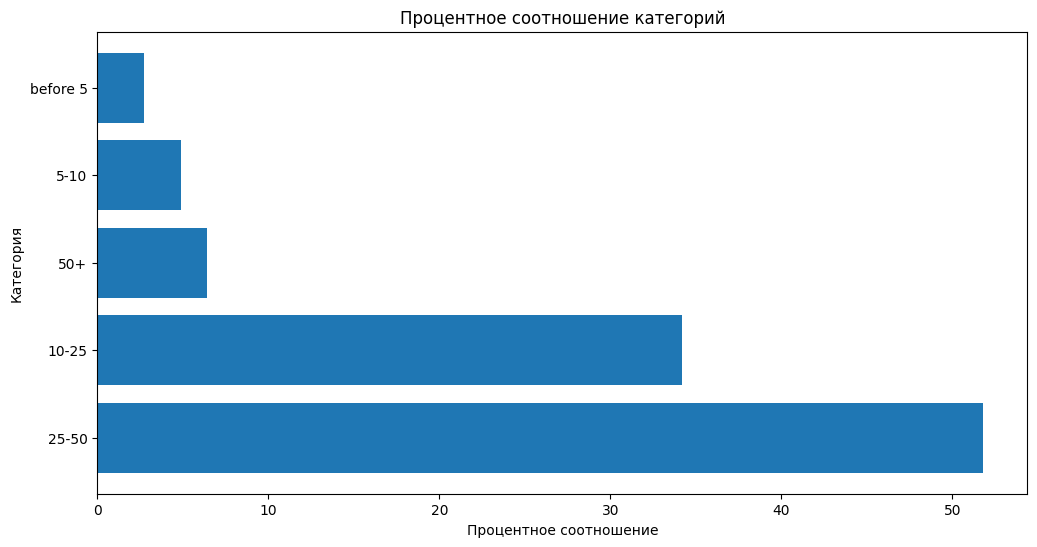

In [ ]:
value_counts = df['HouseAge_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(12, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Процентное соотношение')
ax.set_ylabel('Категория')
ax.set_title('Процентное соотношение категорий')
plt.show()

Проанализируем числовые признаки

In [ ]:
df.corr(numeric_only=True)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Проанализируем категориальный признак

In [ ]:
df_categorical = df.select_dtypes(include='object')
df_categorical

,HouseAge_category
0,25-50
1,10-25
2,50+
3,50+
4,50+
...,...
20635,10-25
20636,10-25
20637,10-25
20638,10-25


In [ ]:
df_categorical.describe()

,HouseAge_category
count,20640
unique,5
top,25-50
freq,10689


Признак 'AveRooms' сделаем целевым, так как от количества комнат в доме зависит цена.

AveRooms: mu = 5.43, sigma = 2.47
AveRooms: Skewness: 20.70
AveRooms: Kurtosis: 879.35


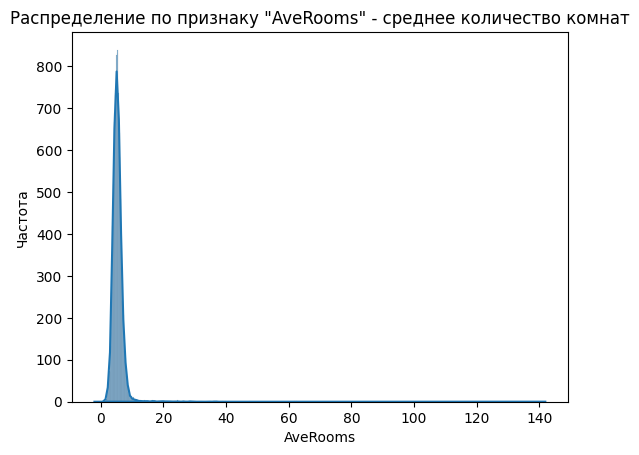

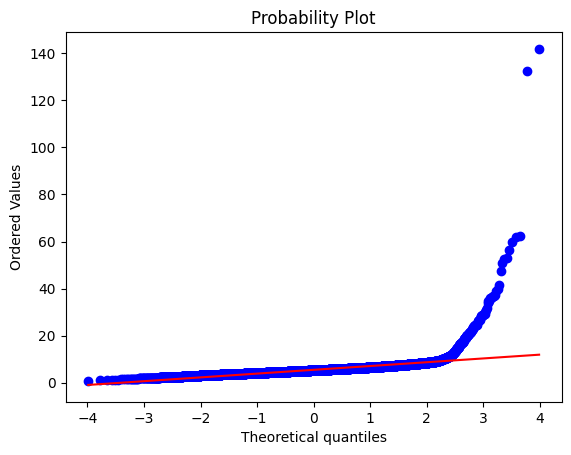

In [ ]:
columns = ['AveRooms']

for col in columns:

    sns.histplot(df[col], kde=True)

    (mu, sigma) = stats.norm.fit(df[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    print('{}: Skewness: {:.2f}'.format(col, df[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, df[col].kurt()))

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.title('Распределение по признаку "{}" - среднее количество комнат'.format(col))

    fig = plt.figure()
    stats.probplot(df[col], plot=plt)

    plt.show()

Распределение по среднему возрасту домов

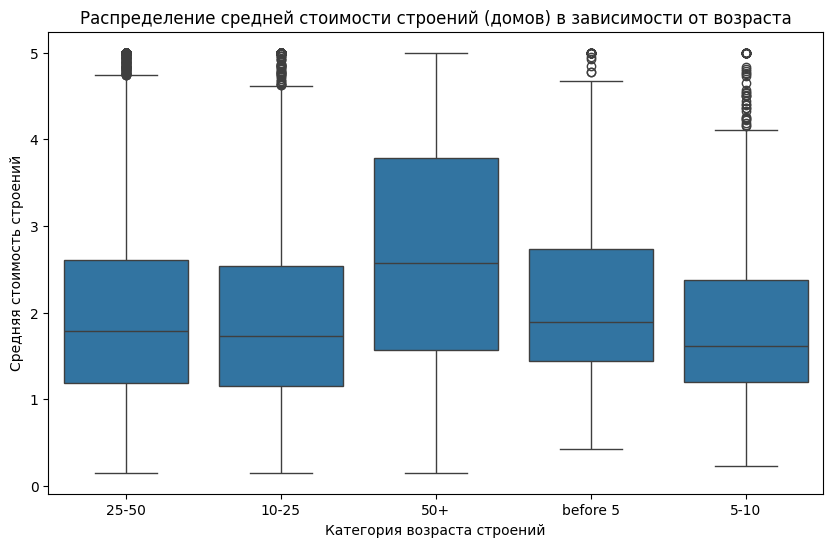

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='HouseAge_category', y='MedHouseVal')
plt.title('Распределение средней стоимости строений (домов) в зависимости от возраста')
plt.xlabel('Категория возраста строений')
plt.ylabel('Средняя стоимость строений')
plt.show()

Многомерный анализ

In [ ]:
# Добавим новую категорию по количеству спален
def assign_broader_category_1(row):
  if 0<row['AveBedrms']<=1:
    return "before 1"
  elif 1<row['AveBedrms']<=2:
    return "1-2"
  elif 2<row['AveBedrms']<=3:
    return "2-3"
  else:
    return "3+"

In [ ]:
df['AveBedrms_category'] = df.apply(assign_broader_category_1, axis=1)

In [ ]:
df['AveBedrms_category'].value_counts()

,count
AveBedrms_category,
1-2,15722
before 1,4683
2-3,128
3+,107


In [ ]:
median = df["AveRooms"].median()
df["AveRooms"].fillna(median, inplace=True)

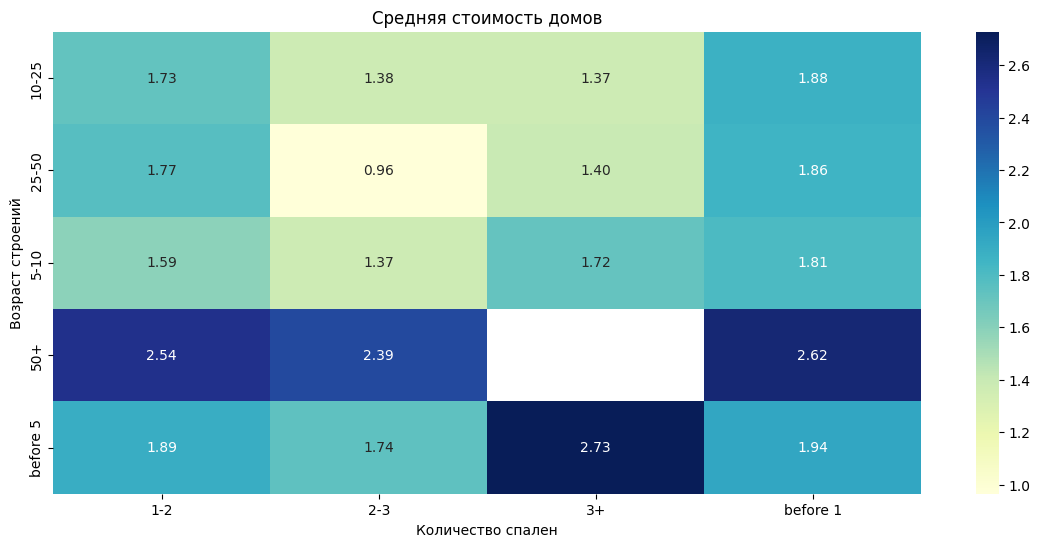

In [ ]:
pivot_table = df.pivot_table(values='MedHouseVal', index='HouseAge_category', columns='AveBedrms_category', aggfunc='median')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Средняя стоимость домов')
plt.xlabel('Количество спален')
plt.ylabel('Возраст строений')
plt.show()

Визуализация распределения нескольких выбранных числовых переменных и корреляции между ними

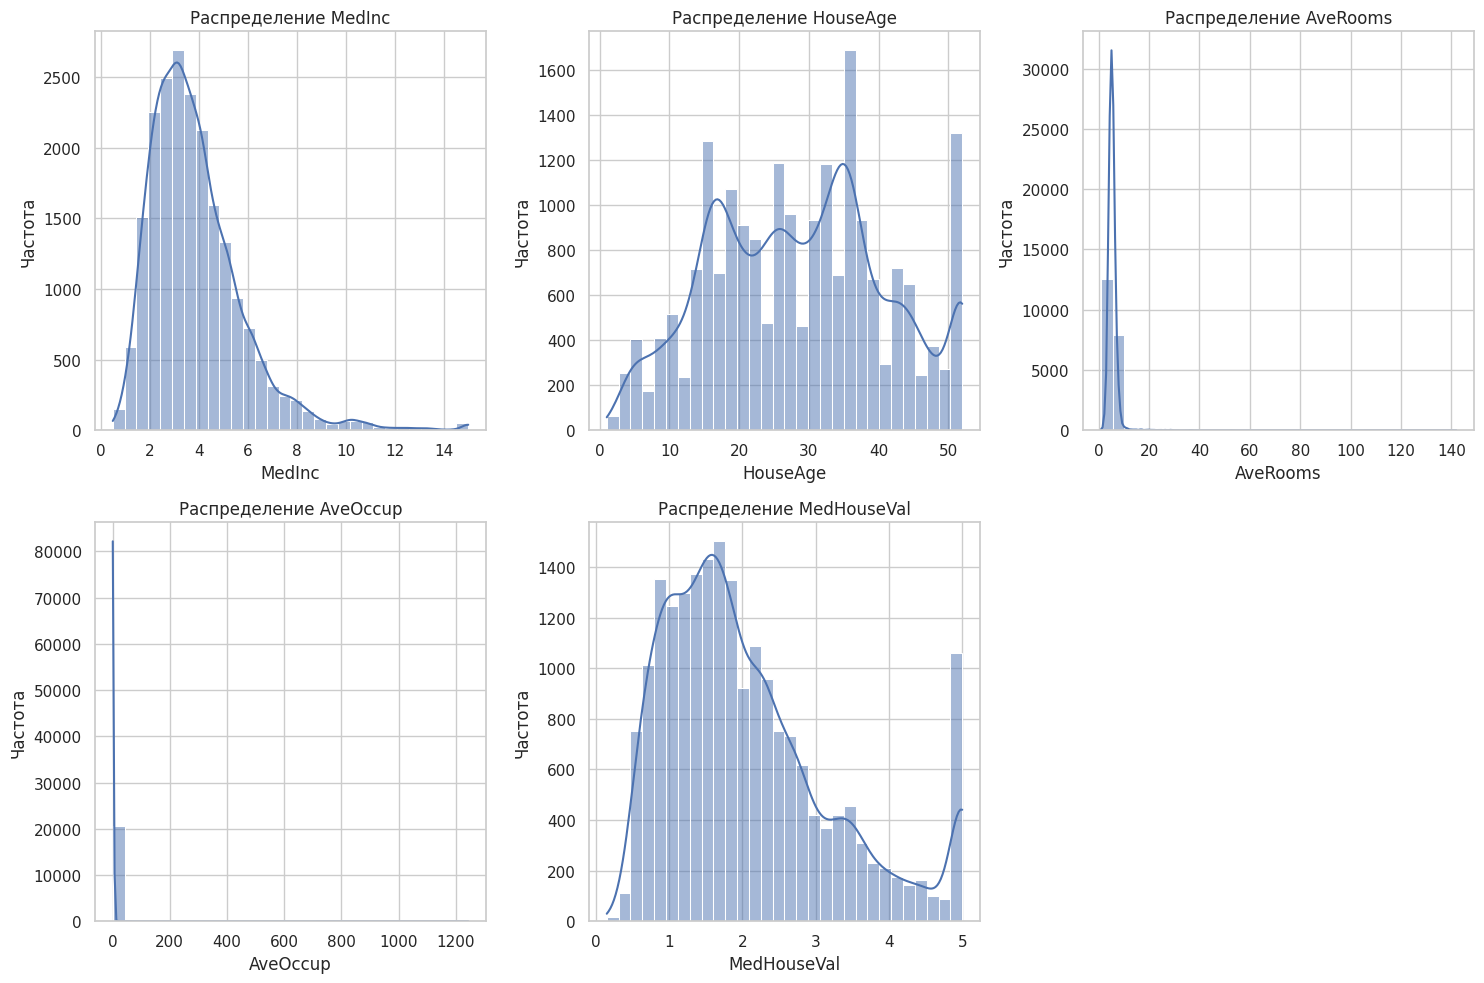

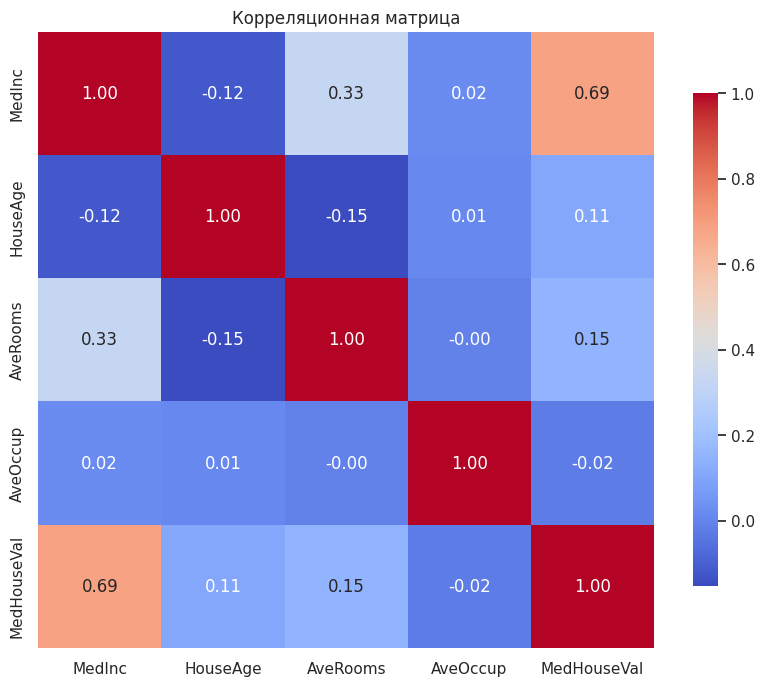

In [ ]:
# Установка стиля графиков
sns.set(style="whitegrid")

# 1. Визуализация распределения нескольких выбранных числовых переменных
selected_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']

plt.figure(figsize=(15, 10))

for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# 2. Визуализация корреляции между выбранными переменными
correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица')
plt.show()

Самая высокая корреляция 0,69 между признаками "MedInc" и "MedHouseVal", что закономерно.

Стандартизация численных признаков и кодировка категориальные признаки

In [ ]:
categorical_columns = ['AveBedrms_category', 'AveBedrms_category']
numerical_columns = ['MedHouseVal']

In [ ]:
dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(df[numerical_columns])

scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [ ]:
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
processed_df = processed_df.drop(['AveBedrms', 'AveBedrms'], axis=1)

In [ ]:
processed_df_copy = processed_df.drop(processed_df.select_dtypes(include = 'object'), axis = 1)

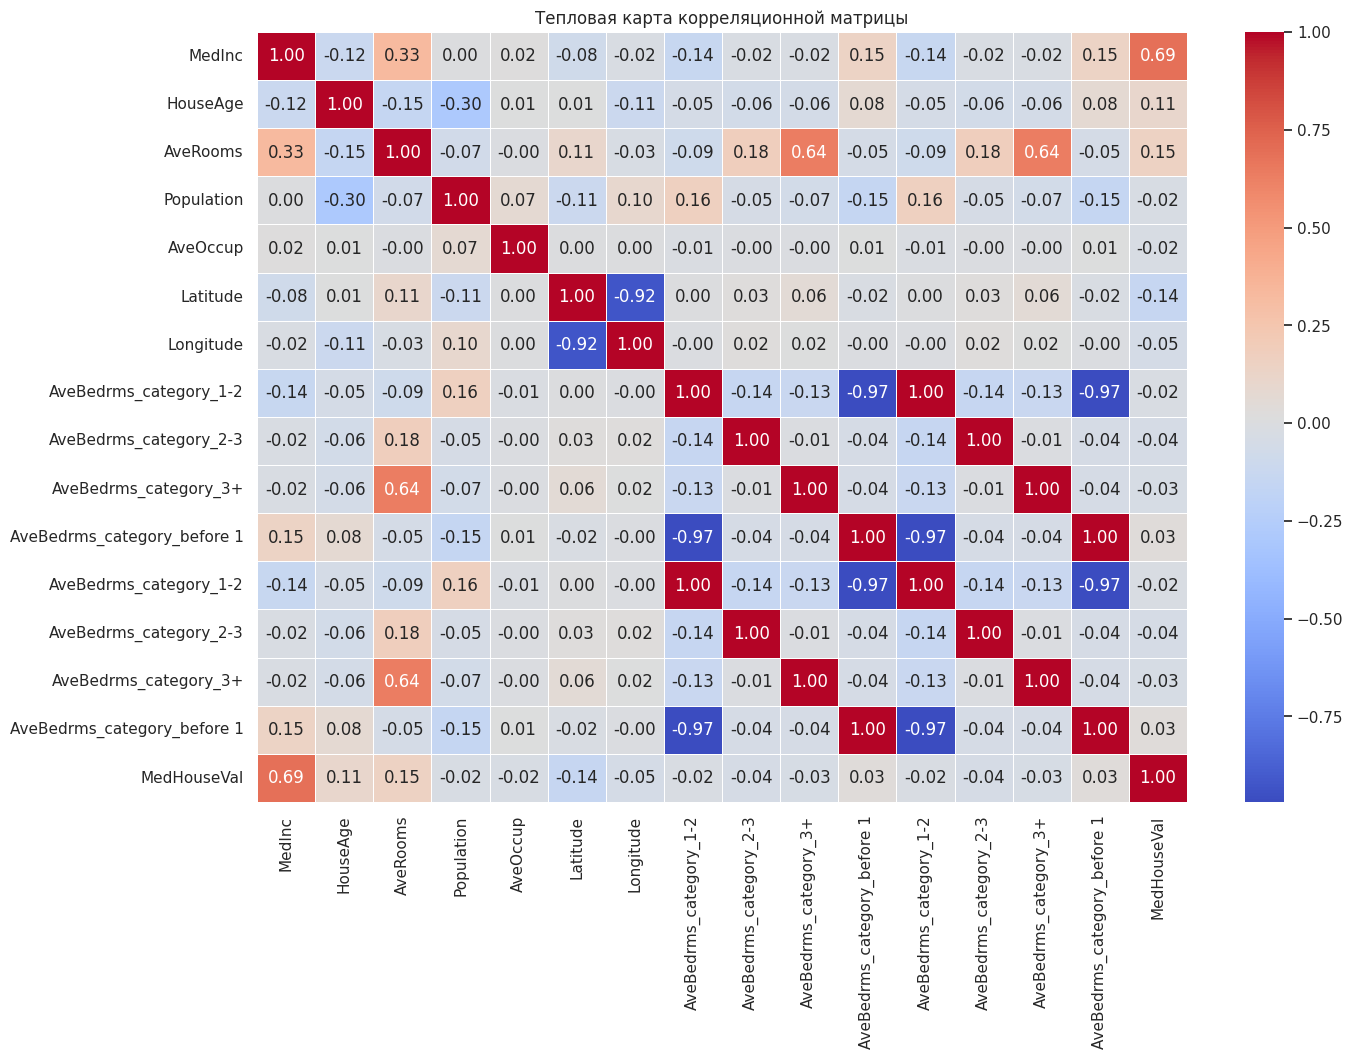

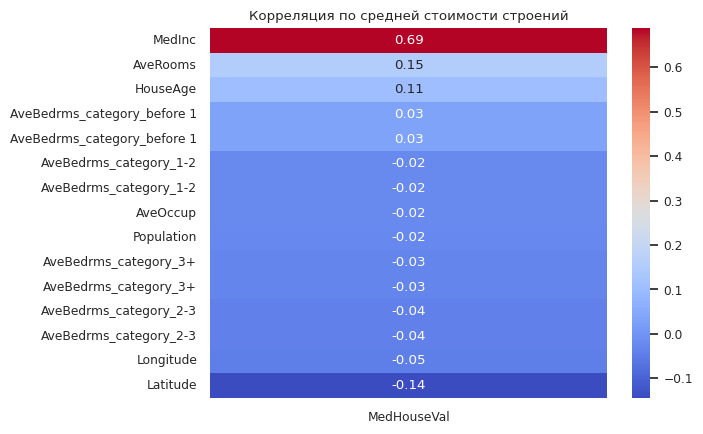

In [ ]:
correlation_matrix = processed_df_copy.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

corr = processed_df_copy.corr()
target_corr = corr['MedHouseVal'].drop('MedHouseVal')

target_corr_sorted = target_corr.sort_values(ascending=False)


sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция по средней стоимости строений')
plt.show()

Вышесделанный вывод подтвердился: самая высокая корреляция 0,69 между признаками "MedInc" и "MedHouseVal", что закономерно.

Положительные значения корреляции (красный цвет) показывают, что между параметрами средний доход в группе строений и средняя стоимость здания существует прямая связь: чем выше средний доход по группе строений, тем выше сама стоимость строения. Отрицательные значения корреляции (синий цвет) говорят о том, что между параметрами и средней стоимостью здания есть обратная связь.


Разделение на обучающую и тестовую выборки

In [ ]:
X = processed_df_copy.drop(["MedHouseVal"], axis=1)
y = processed_df_copy["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
print(f'MSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE: {mean_absolute_error( y_train, y_train_pred)},\
\n R2: {r2_score(y_train, y_train_pred)}')

MSE: 0.3939659467721798,
MAE: 0.4640807197142963,
 R2: 0.6075747868868291


In [ ]:
y_test_pred = lr.predict(X_test)
print(f'MSE: {mean_squared_error( y_test, y_test_pred)},\
\nMAE: {mean_absolute_error( y_test, y_test_pred)},\
\n R2: {r2_score(y_test, y_test_pred)}')

MSE: 0.40073896725857155,
MAE: 0.4620648611980024,
 R2: 0.5927957599741588


Результаты на обучающей выборке:
   - MSE -- 0.3939659467721798
   - MAE -- 0.4640807197142963
   - R2 -- 0.6075747868868291

   Эти значения указывают на качество модели на обучающих данных.
   R2 около 61%, свидетельствует о средней (приемлемой) объясняющей способности модели.

   Результаты на тестовой выборке:
   - MSE -- 0.40073896725857155
   - MAE -- 0.4620648611980024
   - R2 -- 0.5927957599741588

   Эти результаты несколько хуже, чем на обучающем наборе: коэффициент детерминации немного ниже (чуть больше 0.59), что означает, что модель несколько хуже объясняет вариативность тестовой выборки по сравнению с обучающей выборкой.

**Вывод:**

Значение R2 около 61% в модели линейной регрессии указывает на то, что 61% изменчивости зависимой переменной может быть объяснено независимыми переменными, включёнными в модель. Это означает, что модель имеет умеренную прогностическую силу: она объясняет более половины вариаций, но остаётся значительная доля (39%) вариаций, которые не удаётся объяснить.